In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates
import seaborn as sns
sns.set()

In [3]:
#Import Natural Gas Data Set
source = '/Users/AdMiN/Desktop/Data Science Projects/Time Series Project/Natural Gas Data Set/Natural Gas Historical Price.csv'
df = pd.read_csv(source, index_col='Date', parse_dates=True)
df.head()

,Open,High,Low,Close
Date,,,,
1990-04-04,1.600,1.650,1.599,1.620
1990-04-05,1.615,1.635,1.610,1.615
1990-04-06,1.615,1.635,1.610,1.625
1990-04-09,1.612,1.640,1.612,1.637
1990-04-10,1.627,1.630,1.613,1.620


# Exploratory Data Analysis

In [4]:
df.index

DatetimeIndex(['1990-04-04', '1990-04-05', '1990-04-06', '1990-04-09',
               '1990-04-10', '1990-04-11', '1990-04-12', '1990-04-16',
               '1990-04-17', '1990-04-18',
               ...
               '2020-04-27', '2020-04-28', '2020-04-29', '2020-04-30',
               '2020-05-01', '2020-05-04', '2020-05-05', '2020-05-06',
               '2020-05-07', '2020-05-08'],
              dtype='datetime64[ns]', name='Date', length=7633, freq=None)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7633 entries, 1990-04-04 to 2020-05-08
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    7633 non-null   float64
 1   High    7633 non-null   float64
 2   Low     7633 non-null   float64
 3   Close   7633 non-null   float64
dtypes: float64(4)
memory usage: 298.2 KB


In [6]:
df.describe()

,Open,High,Low,Close
count,7633.000000,7633.000000,7633.000000,7633.000000
mean,3.749535,3.831204,3.666312,3.746139
std,2.218772,2.275937,2.158012,2.214021
min,1.040000,1.090000,1.040000,1.075000
25%,2.201000,2.249000,2.165000,2.204000
50%,2.958000,3.018000,2.910000,2.960000
75%,4.590000,4.676000,4.490000,4.577000
max,15.160000,15.780000,14.851000,15.378000


In [12]:
#Highest Price between 1990-2003
max(df['Close']['1990':'2003'])

9.98

In [11]:
#Find the date for 9.98 USD/Mmbtu
con = (df['Close'] ==9.98)
df['Close'][con]

Date
2000-12-27    9.98
Name: Close, dtype: float64

In [14]:
#Highest Price between 1990-2003
max(df['Close']['2003':'2007'])

15.378

In [12]:
#Find the date for 15.378 USD/Mmbtu
con1 = (df['Close'] ==15.378)
df['Close'][con1]

Date
2005-12-13    15.378
Name: Close, dtype: float64

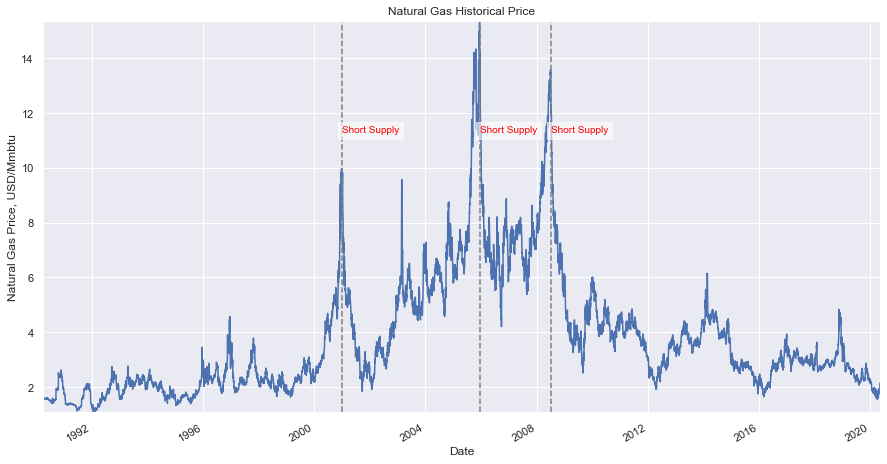

In [7]:
#Visualization 
from pylab import rcParams
rcParams['figure.figsize']=15,8

ax = df['Close'].plot(title='Natural Gas Historical Price')
ax.set(xlabel='Date', ylabel='Natural Gas Price, USD/Mmbtu')
ax.autoscale(axis='both', tight=True)

#Vertical Line
xcoord =['2000-12-27', '2005-12-13','2008-07-03']
for xc in xcoord:
    plt.axvline(x=xc, color='gray', ls='--')
    plt.text(xc, ax.get_ylim()[1]-4, 'Short Supply',
             horizontalalignment='left',
             verticalalignment='center',
             color='red',
             bbox=dict(facecolor='white', alpha=0.6)) 

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Price Bins')]

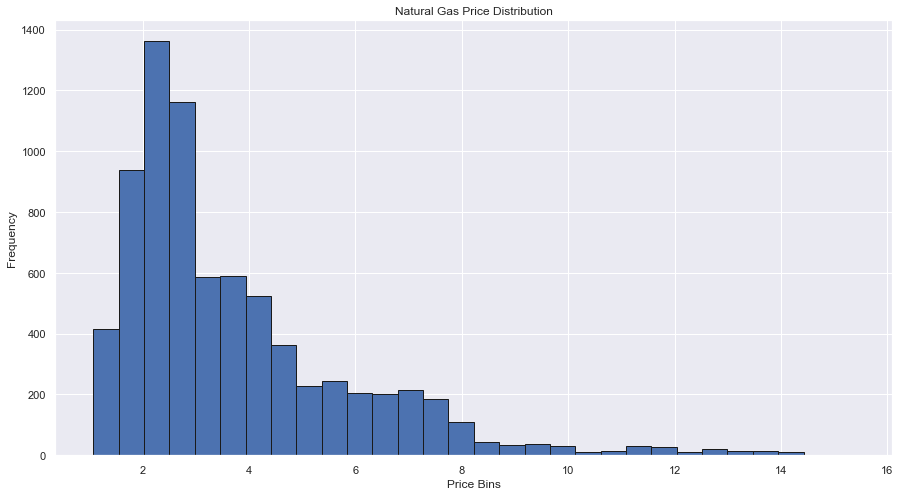

In [8]:
#Price Distribution Histrogram
ax=df['Close'].plot.hist(bins=30, edgecolor='k', title='Natural Gas Price Distribution')
ax.set(xlabel='Price Bins', ylabel='Frequency')

In [9]:
#Calculate Daily Return with pct_change
df['Daily_return']=round(df['Close'].pct_change()*100,2)
df['Daily_return'].fillna(0, inplace=True)
df.head()

,Open,High,Low,Close,Daily_return
Date,,,,,
1990-04-04,1.600,1.650,1.599,1.620,0.00
1990-04-05,1.615,1.635,1.610,1.615,-0.31
1990-04-06,1.615,1.635,1.610,1.625,0.62
1990-04-09,1.612,1.640,1.612,1.637,0.74
1990-04-10,1.627,1.630,1.613,1.620,-1.04


In [10]:
df['Daily_return'].describe()

count    7633.000000
mean        0.058926
std         3.404056
min       -31.320000
25%        -1.780000
50%        -0.030000
75%         1.720000
max        38.310000
Name: Daily_return, dtype: float64

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, '%Daily Return')]

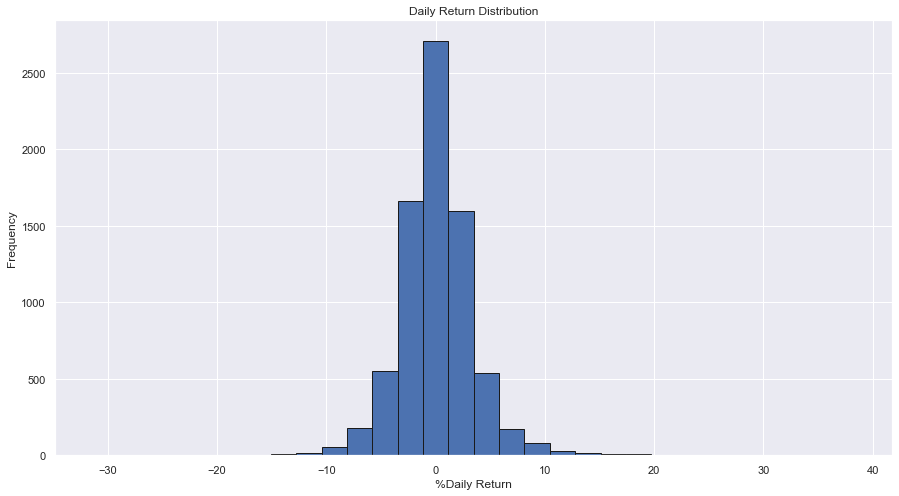

In [11]:
#Visualization Daily Return Distribution
ax = df['Daily_return'].plot.hist(bins=30, edgecolor='k', title='Daily Return Distribution')
ax.set(xlabel ='%Daily Return', ylabel='Frequency')

In [15]:
#Highest Price between 2007-2010
max(df['Close']['2007':'2010'])

13.577

In [13]:
#Find the date for 13.577 USD/Mmbtu
con2 = (df['Close'] ==13.577)
df['Close'][con2]

Date
2008-07-03    13.577
Name: Close, dtype: float64

In [14]:
#What is probability daily return >= 0% and < 1%
con = (df['Daily_return']>=0) & (df['Daily_return']< 1)
print(round(len(df[con])/len(df)*100,2),'%')

15.45 %


In [15]:
#What is probability daily return >= 1% and < 2%
con = (df['Daily_return']>=1) & (df['Daily_return']<2)
print(round(len(df[con])/len(df)*100,2),'%')

12.55 %


In [16]:
#What is probability daily return >= 2% and < 3%
con = (df['Daily_return']>=2) & (df['Daily_return']<3)
print(round(len(df[con])/len(df)*100,2),'%')

8.27 %


In [17]:
#What is probability daily return >= 3% and < 4%
con = (df['Daily_return']>=3) & (df['Daily_return']<4)
print(round(len(df[con])/len(df)*100,2),'%')

4.95 %


In [18]:
#What is probability daily return >= 4% and < 5%
con = (df['Daily_return']>=4) & (df['Daily_return']<5)
print(round(len(df[con])/len(df)*100,2),'%')

2.84 %


# Time Series Analysis

In [19]:
#Resampling Data Set to Monthly data easy to check seasoning
df = df.drop('Daily_return', axis=1)

In [20]:
df_M = df.resample('MS').mean()

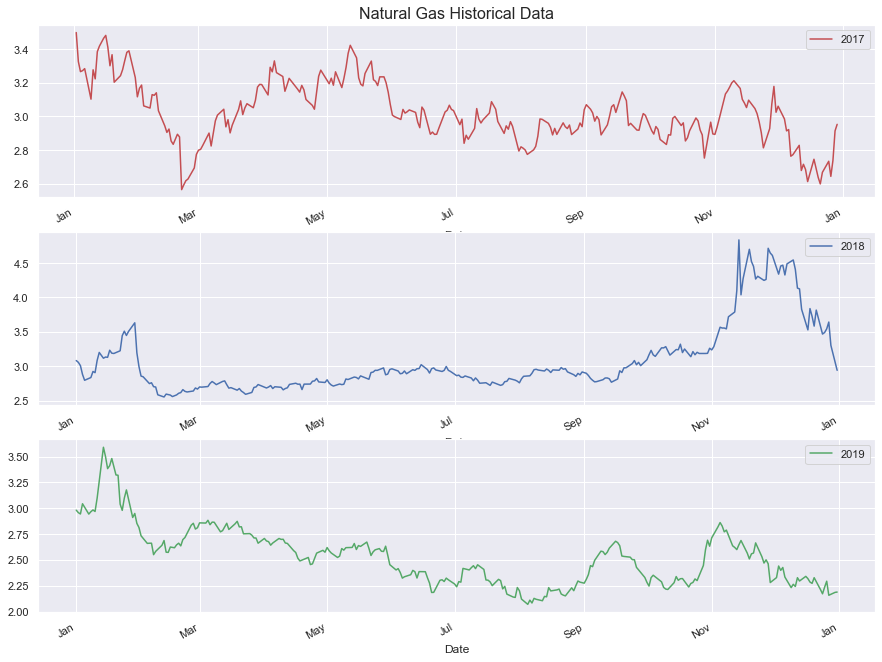

In [21]:
#Check Seasoning by visualizing 
plt.subplot(311)
ax = df['Close']['2017'].plot(figsize=(15,12), color='r', label='2017')
plt.legend(loc='best')
ax.xaxis.set_major_formatter(dates.DateFormatter('%b'))
plt.title('Natural Gas Historical Data', fontsize=16)

plt.subplot(312)
ax = df['Close']['2018'].plot(color='b',label='2018')
plt.legend(loc='best')
ax.xaxis.set_major_formatter(dates.DateFormatter('%b'))

plt.subplot(313)
ax = df['Close']['2019'].plot(color='g',label='2019')
plt.legend(loc='best')
ax.xaxis.set_major_formatter(dates.DateFormatter('%b'))

plt.show()

# Check Stationarity of Time Series

In [22]:
from statsmodels.tsa.stattools import adfuller

#Define function for checking stationarity of time seires
def test_stationarity(timeseries):
    
    #Determine Rolling Statistic
    rolmean = timeseries.rolling(12).mean() #use window=12 in case our data resample to monthly
    rolstd = timeseries.rolling(12).std()
    
    #Plot Rolling Statistic
    plt.figure(figsize=(15,8))

    plt.subplot(211)
    plt.title('Rolling Mean')
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.legend(loc='best')
    
    plt.subplot(212)
    plt.title('Rolling Standard Deviation')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.show(block=False)
    
    #Perform Dickey Fuller Test
    print('Results Dickey Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'P-Value', '#Lags Used','Number of Observation Used'])
    
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    
    print(dfoutput)

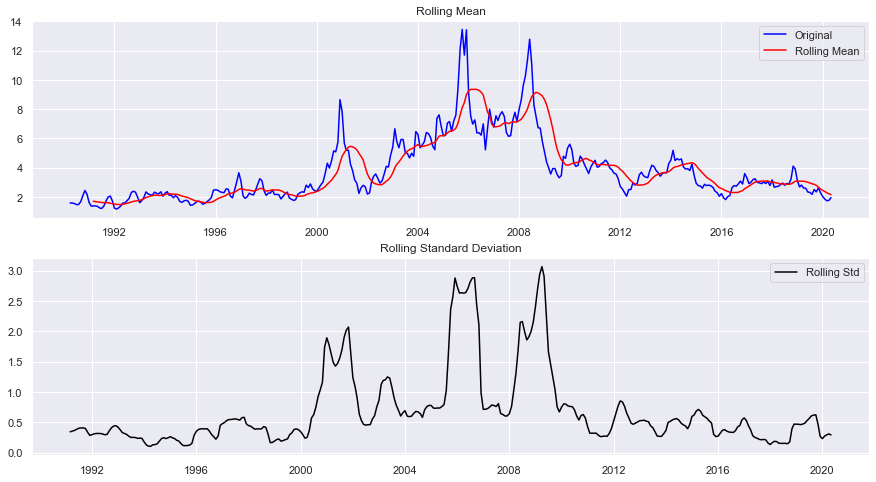

Results Dickey Fuller Test:
Test Statistic                 -2.067219
P-Value                         0.257899
#Lags Used                     10.000000
Number of Observation Used    351.000000
Critical Value (1%)            -3.449119
Critical Value (5%)            -2.869810
Critical Value (10%)           -2.571176
dtype: float64


In [23]:
test_stationarity(df_M['Close'])

# Stationarity

In [24]:
#ACF & PACF Plot to check how data set stationary
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

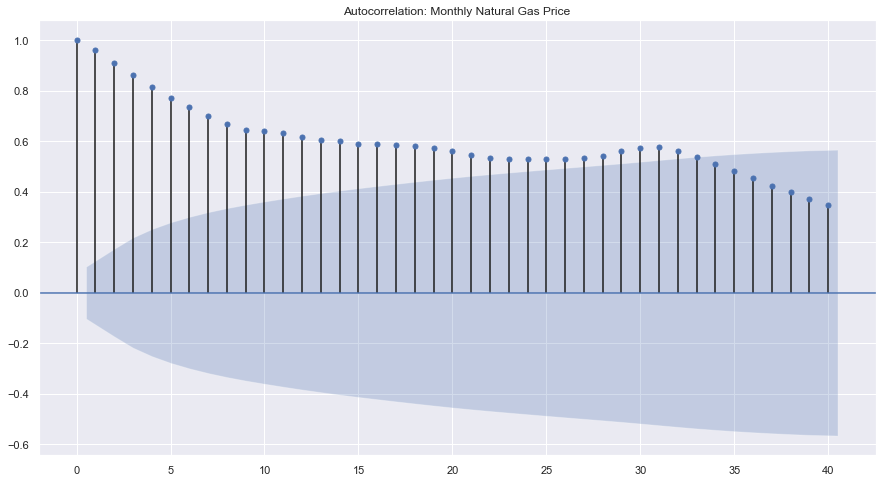

In [25]:
# Now let's plot the autocorrelation at different lags
title = 'Autocorrelation: Monthly Natural Gas Price'
lags = 40
plot_acf(df_M['Close'],title=title,lags=lags);

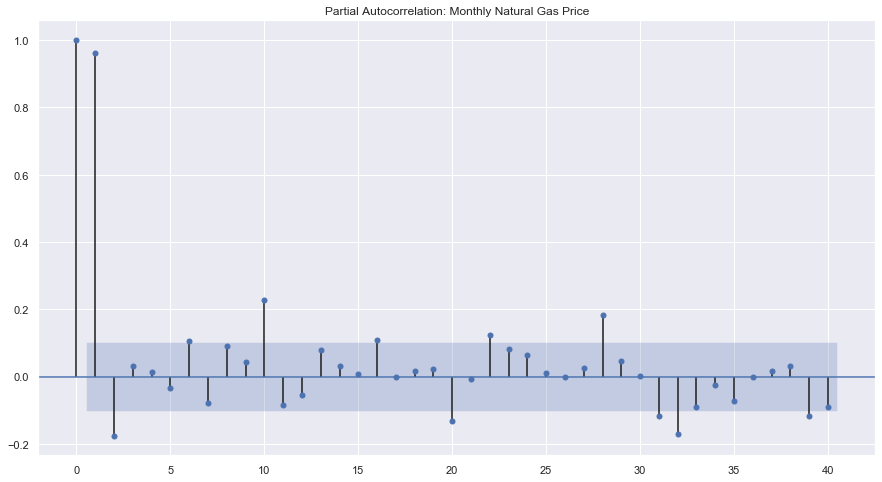

In [26]:
# Now let's plot the autocorrelation at different lags
title = 'Partial Autocorrelation: Monthly Natural Gas Price'
lags = 40
plot_pacf(df_M['Close'],title=title,lags=lags);

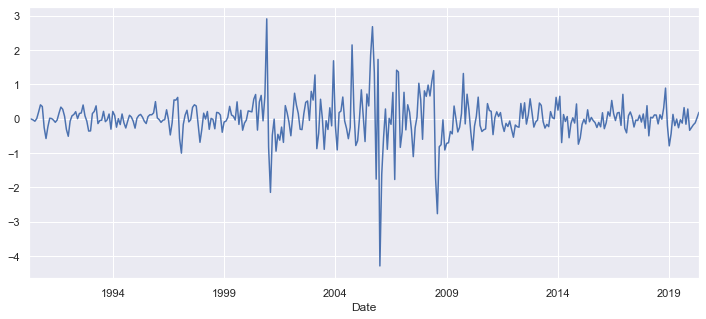

In [27]:
from statsmodels.tsa.statespace.tools import diff

df_M['d1'] = diff(df_M['Close'],k_diff=1)
df_M['d1'].plot(figsize=(12,5));

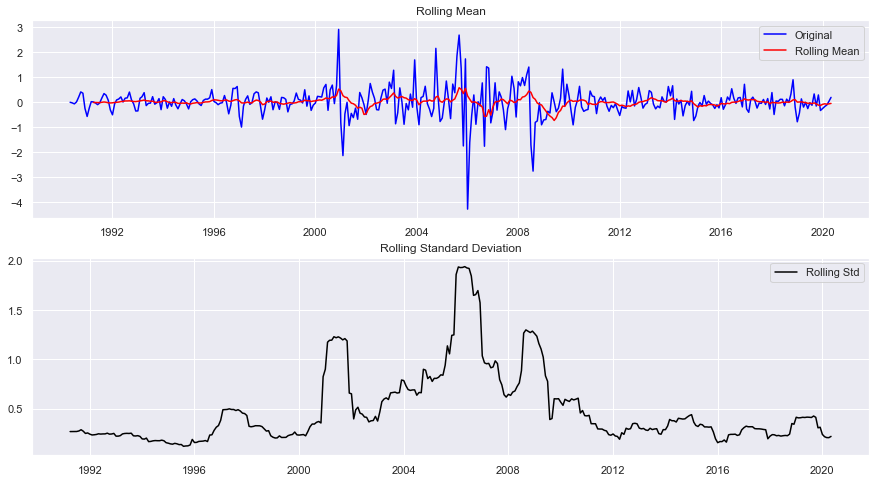

Results Dickey Fuller Test:
Test Statistic               -9.336122e+00
P-Value                       9.053200e-16
#Lags Used                    8.000000e+00
Number of Observation Used    3.520000e+02
Critical Value (1%)          -3.449065e+00
Critical Value (5%)          -2.869786e+00
Critical Value (10%)         -2.571163e+00
dtype: float64


In [28]:
df_M['d1'].dropna(inplace=True)
test_stationarity(df_M['d1'])

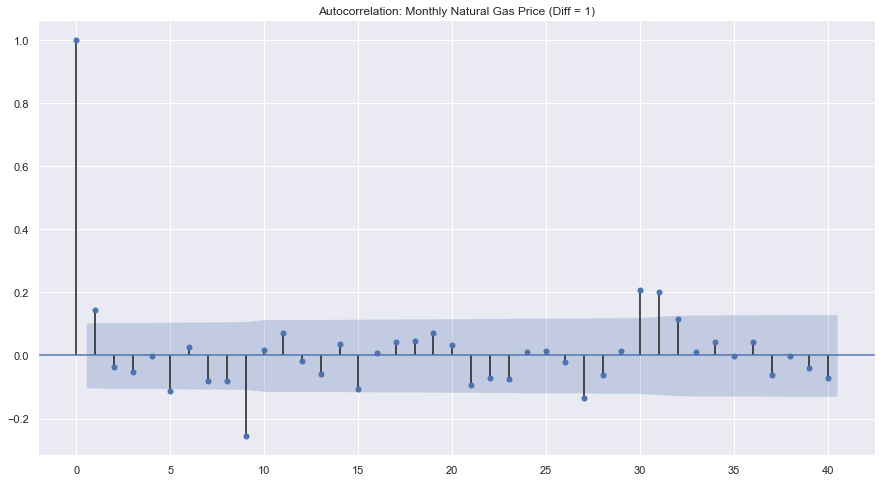

In [29]:
#Autocorrelation after differencing
title = 'Autocorrelation: Monthly Natural Gas Price (Diff = 1)'
lags = 40
plot_acf(df_M['d1'],title=title,lags=lags);

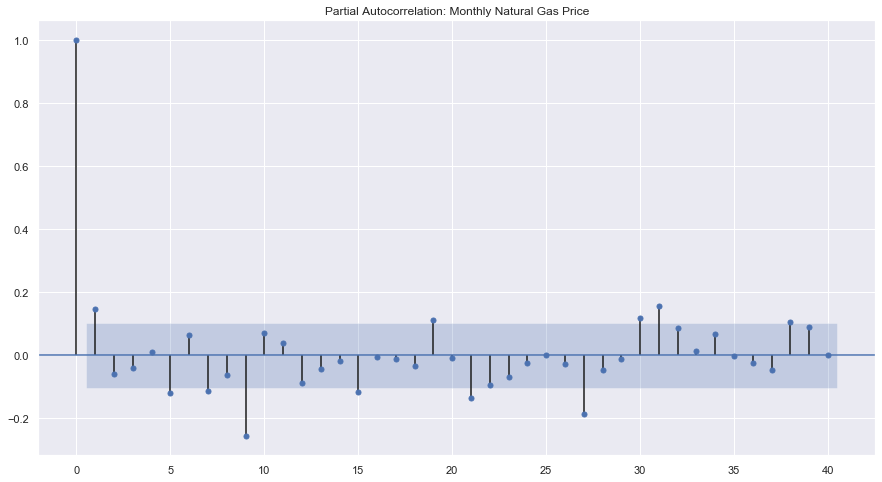

In [30]:
# Now let's plot the partial-autocorrelation at different lags
title = 'Partial Autocorrelation: Monthly Natural Gas Price'
lags = 40
plot_pacf(df_M['d1'],title=title,lags=lags);

# Decomposition

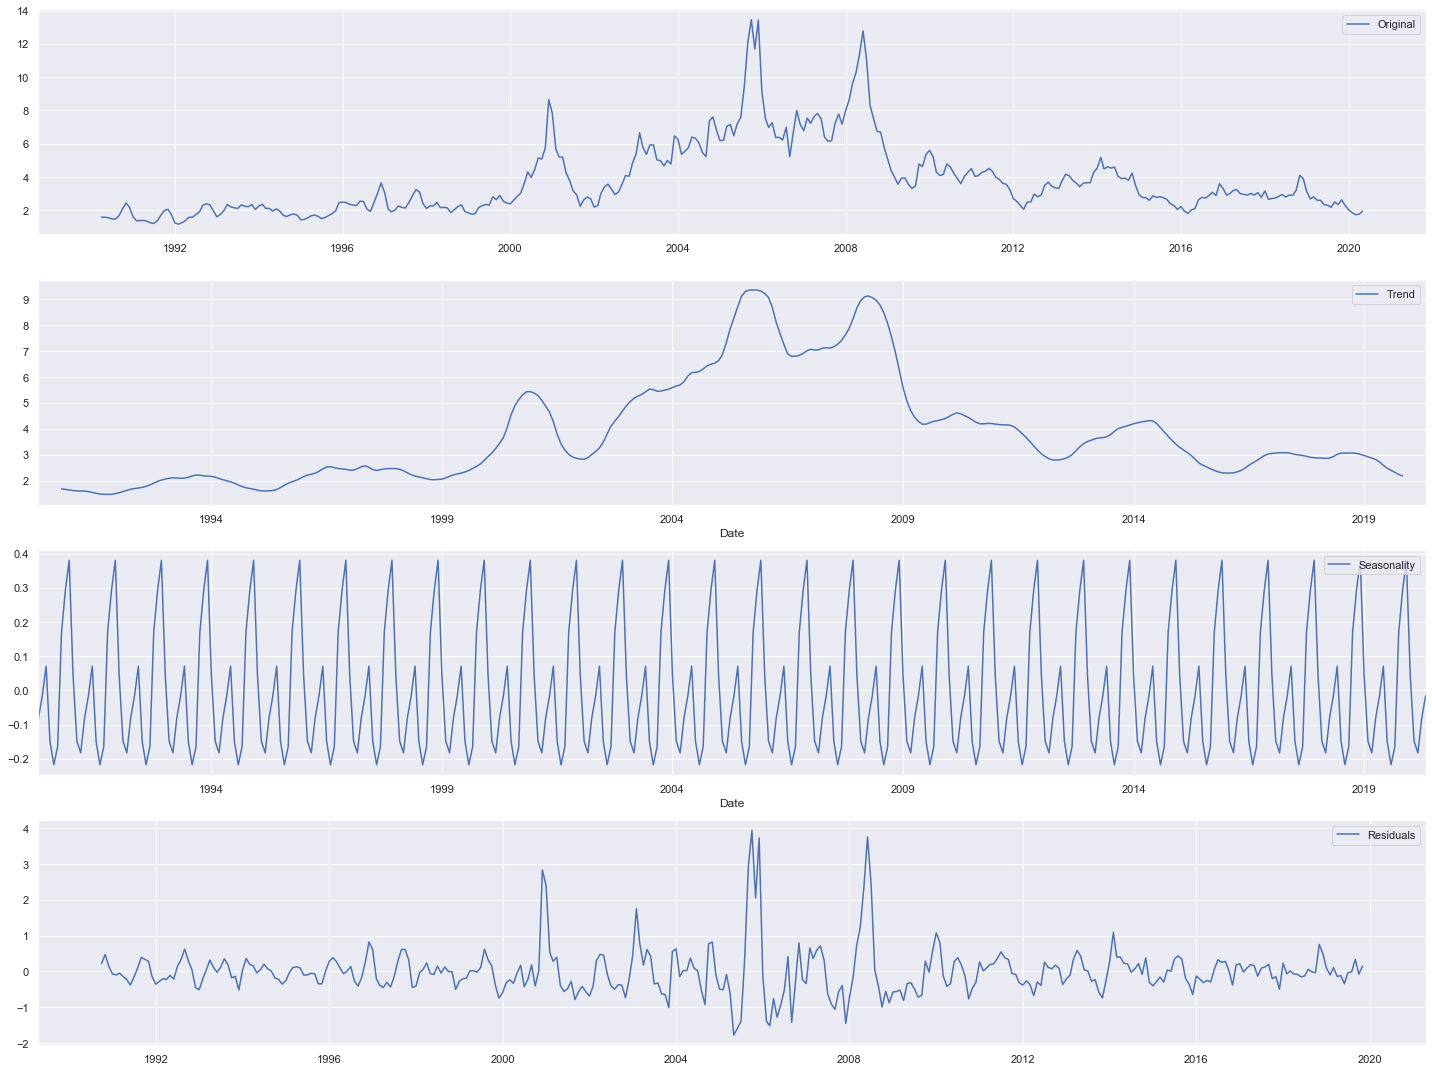

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_M['Close'])

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

#Visualization
plt.figure(figsize=(20,15))

plt.subplot(411)
plt.plot(df_M['Close'], label='Original')
plt.legend(loc='best')

plt.subplot(412)
ax = trend.plot(label='Trend')
plt.legend(loc='best')

plt.subplot(413)
ax = seasonal.plot(label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

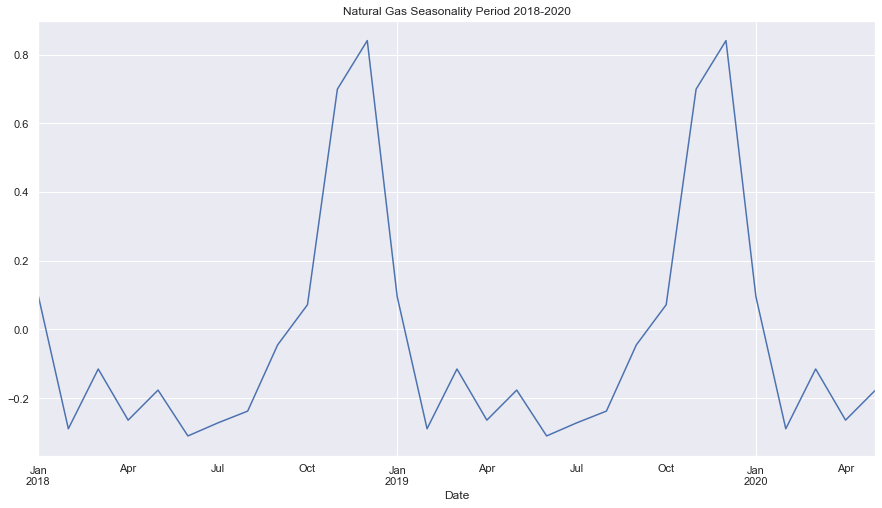

In [32]:
#Check Seasonal
decomposition = seasonal_decompose(df_M['Close']['2018':'2020'])
seasonal = decomposition.seasonal

#Visualization
seasonal.plot(title='Natural Gas Seasonality Period 2018-2020')

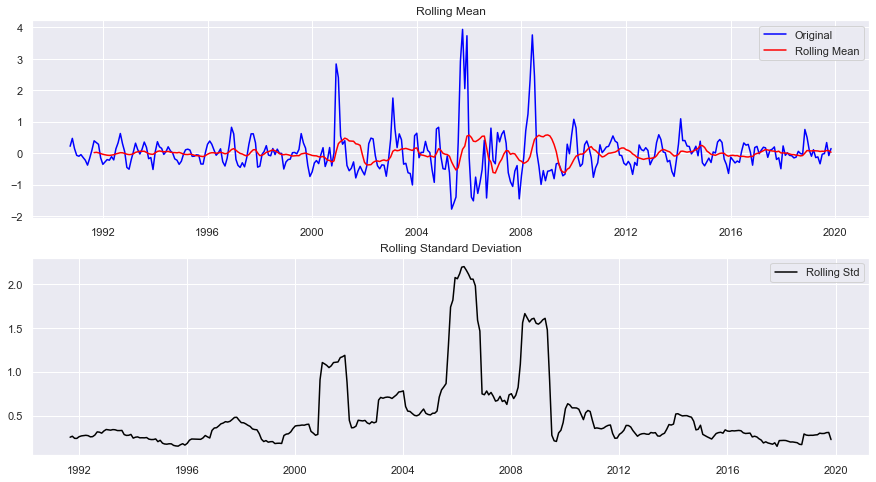

Results Dickey Fuller Test:
Test Statistic               -9.180318e+00
P-Value                       2.261173e-15
#Lags Used                    1.100000e+01
Number of Observation Used    3.380000e+02
Critical Value (1%)          -3.449846e+00
Critical Value (5%)          -2.870129e+00
Critical Value (10%)         -2.571346e+00
dtype: float64


In [33]:
#Check Stationarity of Residual

ts_decompose = residual
ts_decompose.dropna(inplace=True)
test_stationarity(ts_decompose)

# Forecasting Model

In [34]:
#Simple Moving Average 12 Months
df_M['SMA-12'] = df_M['Close'].rolling(12).mean()

In [66]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
span =12
alpha = 2/(span+1)
df_M['EWMA-12']=df_M['Close'].ewm(alpha=alpha, adjust=False).mean()

In [39]:
#Create Double Exponential Moving 
from statsmodels.tsa.holtwinters import ExponentialSmoothing
df_M['DES-add-12'] = ExponentialSmoothing(df_M['Close'], trend='add').fit().fittedvalues.shift(-1)

In [45]:
#Create Tripple Exponential Moving
df_M['TES-12'] = ExponentialSmoothing(df_M['Close'], trend='mul', seasonal='mul',seasonal_periods=12).fit().fittedvalues

Text(0, 0.5, 'USD/Mmbtu')

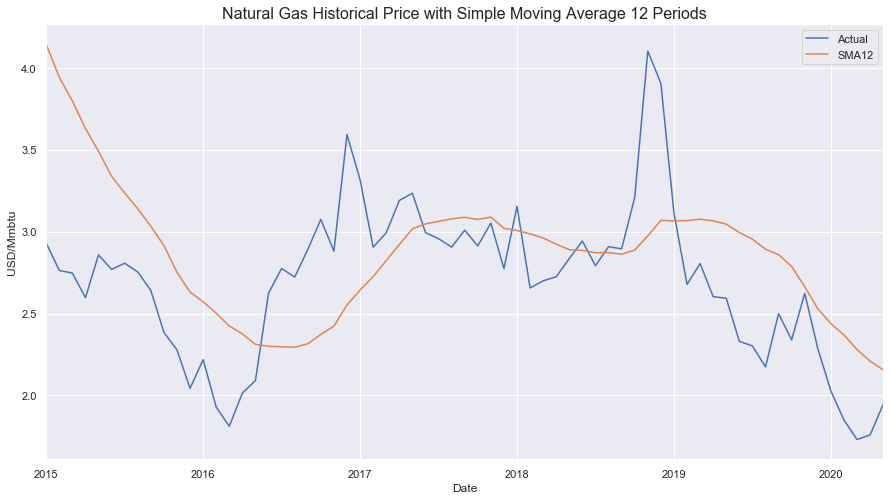

In [61]:
#Visualization all models
df_M['Close']['2015':'2020'].plot(legend=True,label='Actual')
df_M['SMA-12']['2015':'2020'].plot(legend=True,label='SMA12')
#df_M['DES-add-12']['2015':'2020'].plot(legend=True,label='DES_add_12')
#df_M['TES-12']['2015':'2020'].plot(legend=True,label='TES12')
plt.title('Natural Gas Historical Price with Simple Moving Average 12 Periods', fontsize=16)
plt.ylabel('USD/Mmbtu')

Text(0, 0.5, 'USD/Mmbtu')

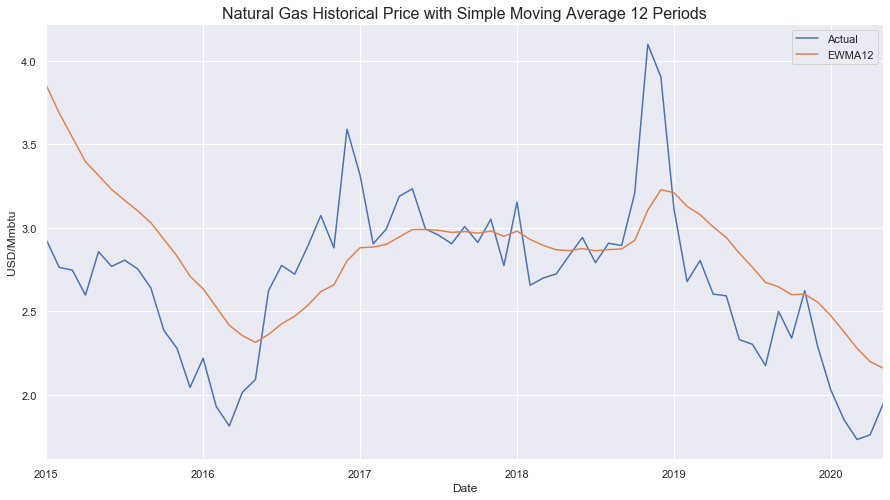

In [67]:
#Visualization all models
df_M['Close']['2015':'2020'].plot(legend=True,label='Actual')
df_M['EWMA-12']['2015':'2020'].plot(legend=True,label='EWMA12')
plt.title('Natural Gas Historical Price with Simple Moving Average 12 Periods', fontsize=16)
plt.ylabel('USD/Mmbtu')

Text(0, 0.5, 'USD/Mmbtu')

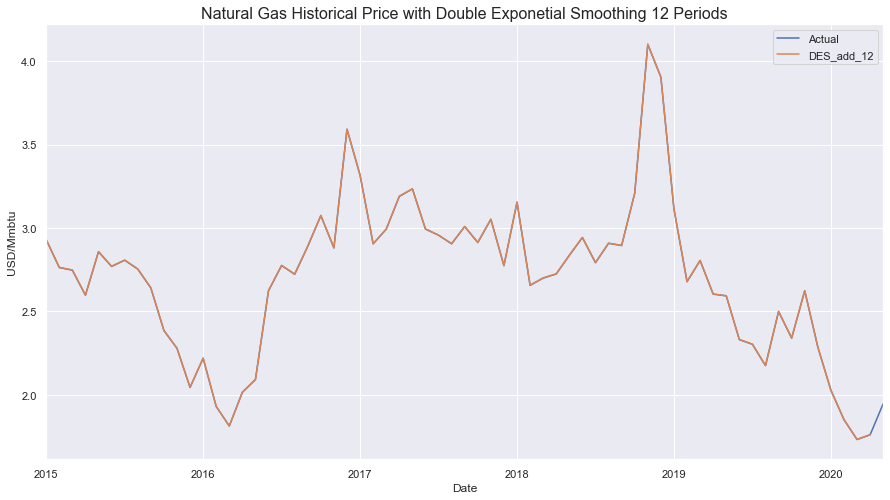

In [62]:
df_M['Close']['2015':'2020'].plot(legend=True,label='Actual')
df_M['DES-add-12']['2015':'2020'].plot(legend=True,label='DES_add_12')
plt.title('Natural Gas Historical Price with Double Exponetial Smoothing 12 Periods', fontsize=16)
plt.ylabel('USD/Mmbtu')

Text(0, 0.5, 'USD/Mmbtu')

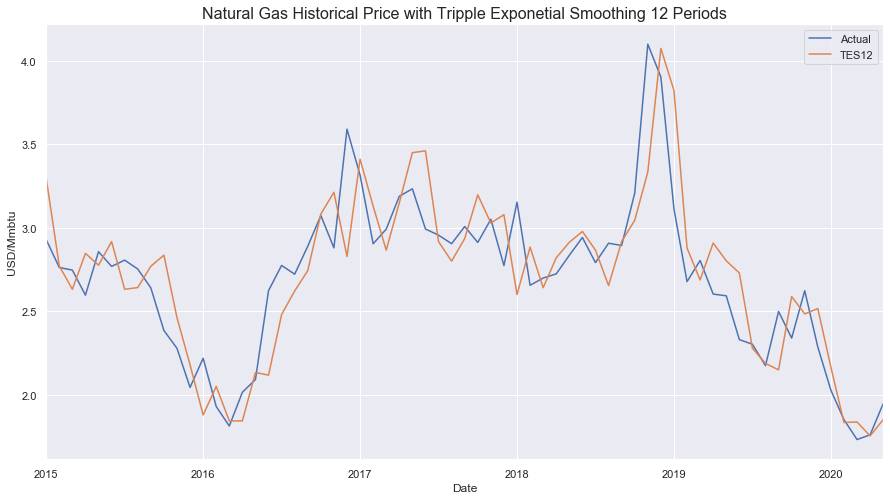

In [63]:
df_M['Close']['2015':'2020'].plot(legend=True,label='Actual')
df_M['TES-12']['2015':'2020'].plot(legend=True,label='TES12')
plt.title('Natural Gas Historical Price with Tripple Exponetial Smoothing 12 Periods', fontsize=16)
plt.ylabel('USD/Mmbtu')

# Train and Test Split

In [72]:
#Split data set to train & test
train = df_M.iloc[:290] #split 80% training set
test = df_M.iloc[290:] #split 20% test set

In [80]:
#Fit Tripple Exponential Smoothing
fitted_model = ExponentialSmoothing(train['Close'], trend='mul', seasonal='mul', seasonal_periods=12).fit()
test_pred = fitted_model.forecast(12)

D:\Python\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
D:\Python\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
D:\Python\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


Text(0, 0.5, 'USD/Mmbtu')

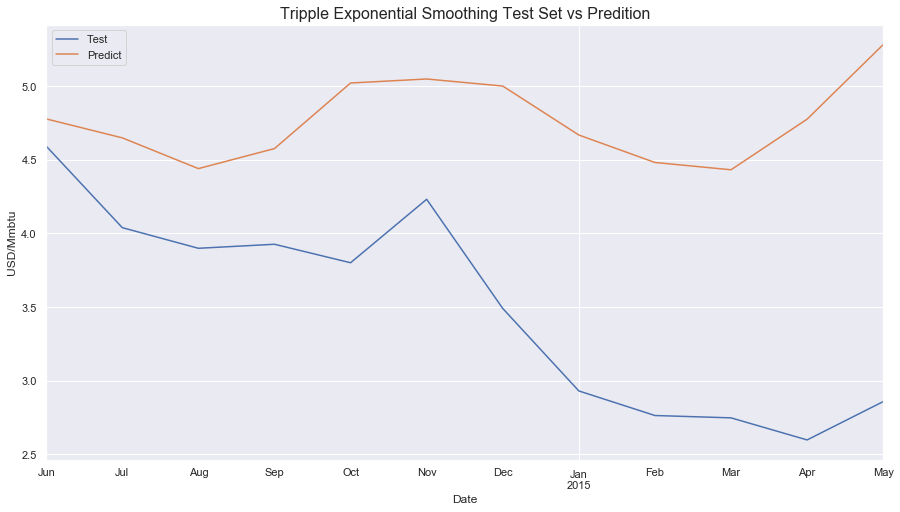

In [85]:
test['Close']['2014-06-01':'2015-05-01'].plot(legend=True, label='Test')
test_pred.plot(legend=True, label='Predict')
plt.title('Tripple Exponential Smoothing Test Set vs Predition', fontsize=16)
plt.ylabel('USD/Mmbtu')

In [90]:
#Fit Tripple Exponential Smoothing
fitted_model1 = ExponentialSmoothing(train['Close'], trend='add').fit()
test_pred1 = fitted_model1.forecast(12)

Text(0, 0.5, 'USD/Mmbtu')

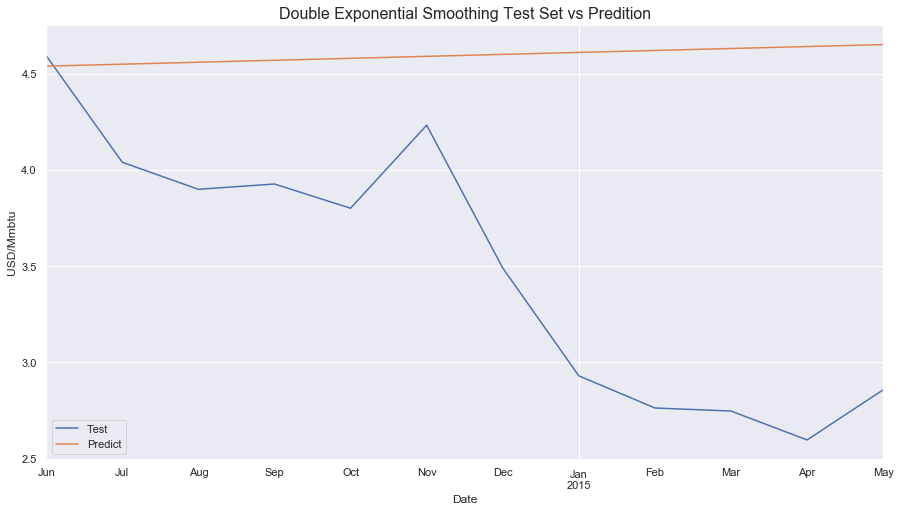

In [92]:
test['Close']['2014-06-01':'2015-05-01'].plot(legend=True, label='Test')
test_pred1.plot(legend=True, label='Predict')
plt.title('Double Exponential Smoothing Test Set vs Predition', fontsize=16)
plt.ylabel('USD/Mmbtu')

# Evaluation Model

In [96]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(test['Close']['2014-06-01':'2015-05-01'], test_pred)
print(f'TES_12 MSE Error: {error:11.10}')

ARIMA(2,1,3) MSE Error: 2.086342815


In [98]:
error1 = mean_squared_error(test['Close']['2014-06-01':'2015-05-01'], test_pred1)
print(f'DES_12 MSE Error: {error1:11.10}')

DES_12 MSE Error: 1.692036447


# Choosing ARIMA Order

In [99]:
from pmdarima import auto_arima

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [100]:
# For SARIMA Orders we set seasonal=True and pass in an m value
mod = auto_arima(train['Close'],seasonal=True,m=12)
print(mod.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  290
Model:               SARIMAX(2, 1, 3)   Log Likelihood                -278.193
Date:                Tue, 12 May 2020   AIC                            570.385
Time:                        12:18:20   BIC                            596.050
Sample:                             0   HQIC                           580.669
                                - 290                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0031      0.008      0.379      0.705      -0.013       0.019
ar.L1         -0.1309      0.077     -1.706      0.088      -0.281       0.020
ar.L2          0.7938      0.080      9.927      0.0

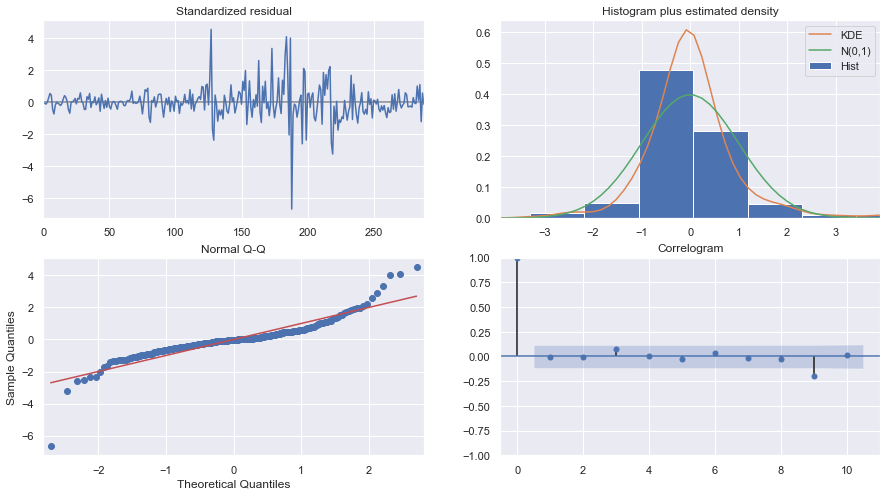

In [101]:
mod.plot_diagnostics(figsize=(15,8))
plt.show()

In this case, our model diagnostics suggests that the model residuals are not close to normally distributed based on the following:

In the top right plot, we see that the red KDE mean is 0 but the shape not close to normal distribution N(0,1), it pretty narrow shape.

The qq-plot on the bottom left shows that the ordered distribution of residuals (blue dots) almost follows the linear trend of the samples taken from a standard normal distribution with N(0, 1). Again, this is indication that the residuals are almost normally distributed N(0,1)

The residuals over time (top left plot) don’t display any obvious seasonality and appear to be white noise. This is confirmed by the autocorrelation (i.e. correlogram) plot on the bottom right, which shows that the time series residuals have low correlation with lagged versions of itself.

In [114]:
# Load specific forecasting tools
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults

model = ARIMA(train['Close'],order=(2,1,3))
results = model.fit()

# Obtain predicted values
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=True, typ='levels').rename('ARIMA(2,1,3) Predictions')

In [115]:
# Compare predictions to expected values
for i in range(len(predictions)):
    print(f"predicted={predictions[i]:<11.10}, expected={test['Close'][i]}")

predicted=4.530381974, expected=4.593809523809524
predicted=4.429231228, expected=4.039695652173913
predicted=4.469393272, expected=3.8993809523809526
predicted=4.386863133, expected=3.9268181818181813
predicted=4.432736201, expected=3.801086956521739
predicted=4.36425302 , expected=4.2324
predicted=4.412819981, expected=3.490478260869564
predicted=4.355145468, expected=2.929913043478261
predicted=4.404433952, expected=2.7628571428571433
predicted=4.355253781, expected=2.7469090909090905
predicted=4.40400032 , expected=2.596863636363637
predicted=4.36164131 , expected=2.8574545454545452
predicted=4.409061579, expected=2.7692272727272726
predicted=4.372297124, expected=2.806695652173913
predicted=4.417928915, expected=2.7534761904761904
predicted=4.385844983, expected=2.6405217391304348
predicted=4.429441016, expected=2.385045454545454
predicted=4.401343742, expected=2.278095238095239
predicted=4.442798619, expected=2.0435
predicted=4.418150464, expected=2.218619047619048
predicted=4.45

Text(0, 0.5, 'USD/Mmbtu')

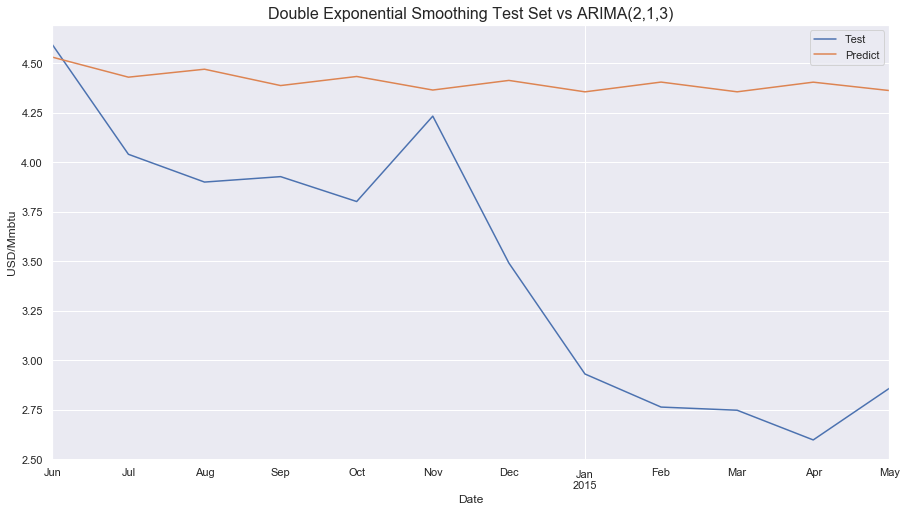

In [122]:
test['Close']['2014-06-01':'2015-05-01'].plot(legend=True, label='Test')
predictions['2014-06-01':'2015-05-01'].plot(legend=True, label='Predict')
plt.title('Double Exponential Smoothing Test Set vs ARIMA(2,1,3)', fontsize=16)
plt.ylabel('USD/Mmbtu')

# Evaluate Model

In [116]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(test['Close']['2014-06-01':'2015-05-01'], predictions['2014-06-01':'2015-05-01'])
print(f'ARIMA(2,1,3) MSE Error: {error:11.10}')

ARIMA(2,1,3) MSE Error: 1.233379333


# Retrain the model on the full data, and forecast the future

In [153]:
model = ARIMA(df_M['Close'],order=(2,1,3))
results = model.fit()
fcast = results.predict(len(df_M['Close']),len(df_M['Close'])+11,typ='levels').rename('ARIMA(2,1,3) Forecast')

[Text(0, 0.5, 'USD/Mmbtu'), Text(0.5, 0, 'Date')]

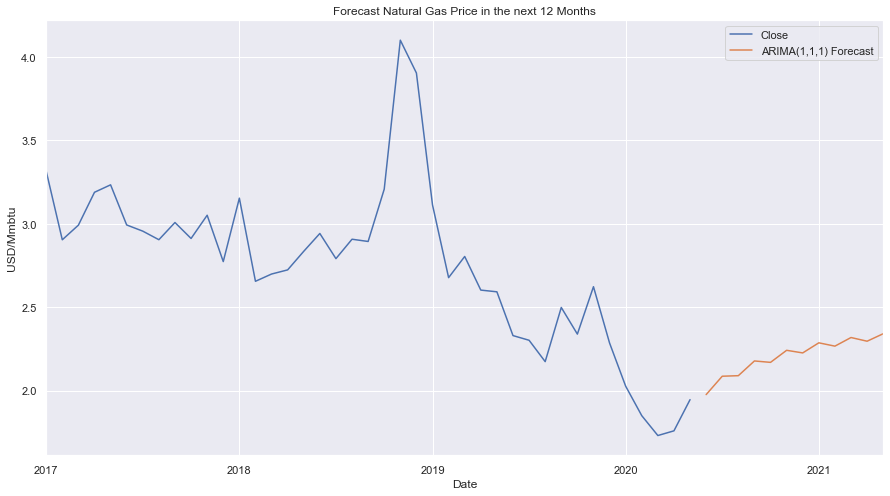

In [152]:
# Plot predictions against known values
title = 'Forecast Natural Gas Price in the next 12 Months'
ylabel='USD/Mmbtu'
xlabel='Date' 

ax = df_M['Close']['2017':].plot(legend=True,figsize=(15,8),title=title)
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

# Check ARIMA (2,1,3) with Confidence Interval

In [189]:
mod = sm.tsa.statespace.SARIMAX(df_M['Close'],
                                order = (2,1,3),
                                seasonal_order=(0,0,0,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1323      0.069     -1.932      0.053      -0.267       0.002
ar.L2          0.7800      0.073     10.742      0.000       0.638       0.922
ma.L1          0.2949      0.064      4.592      0.000       0.169       0.421
ma.L2         -0.8407      0.068    -12.418      0.000      -0.973      -0.708
ma.L3         -0.2856      0.032     -8.861      0.000      -0.349      -0.222
sigma2         0.3425      0.011     30.264      0.000       0.320       0.365


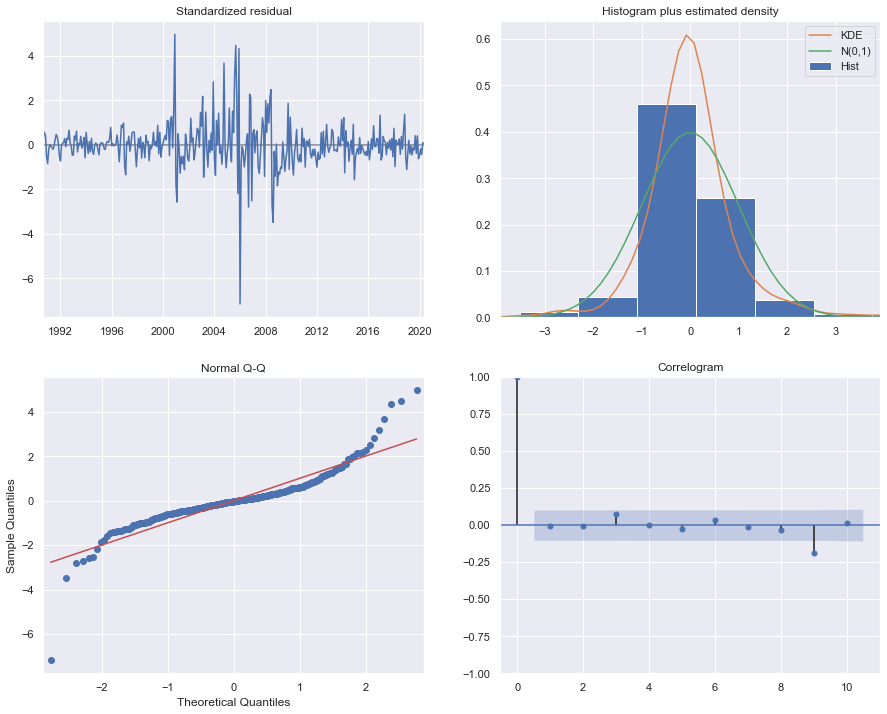

In [190]:
#Check Unsual Behavior
results.plot_diagnostics(figsize=(15,12))
plt.show()

In [193]:
pred = results.get_prediction(start=pd.to_datetime('2014-06-01'), dynamic=False)
pred_ci = pred.conf_int()

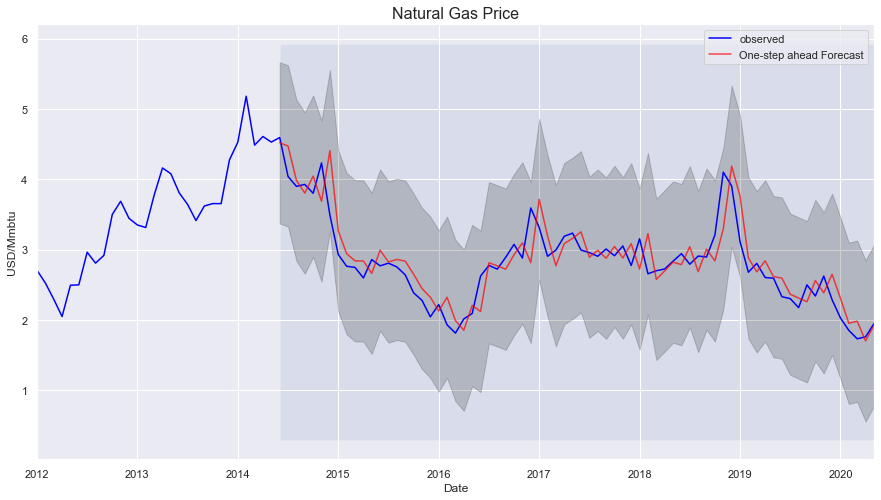

In [195]:
#Visualization 

ax = df_M['Close']['2012':].plot(label='observed', figsize=(15,8),color='blue')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=0.7, color='red')

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:,0],
                pred_ci.iloc[:,1], color='k', alpha=0.2)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2014-06-01'), df.index[-1], alpha=0.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('USD/Mmbtu')
ax.set_title('Natural Gas Price', fontsize=16)
plt.legend()
plt.show()

In [165]:
#Compare Actual Value and Forecast to find MSE
df_forcasted = pred.predicted_mean
df_truth = df_M['Close']['2014-06-01':]

#Compute MSE
mse = ((df_forcasted - df_truth)**2).mean()
print('The Mean Square Error of our forcast is {}'.format(round(mse,2)))

The Mean Square Error of our forcast is 0.09


In [166]:
#Compute the dynamic forecast and confidence interval
pred_dynamic = results.get_prediction(start=pd.to_datetime('2014-06-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

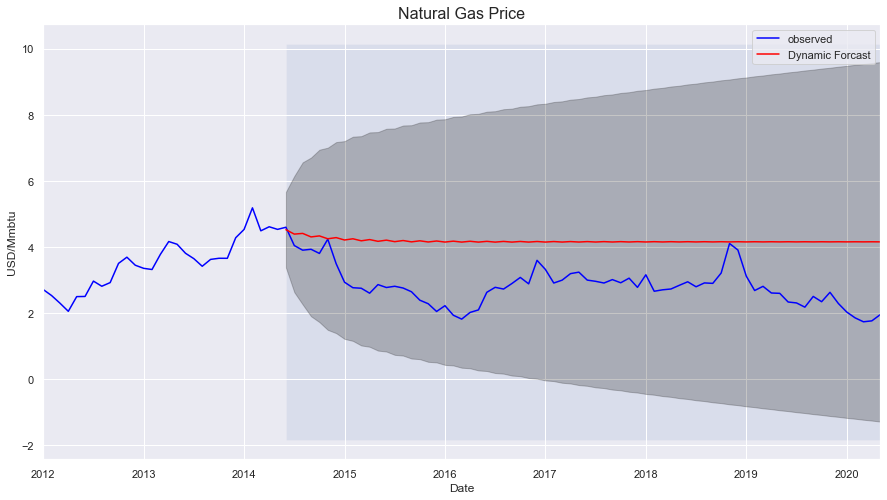

In [197]:
#Visualization 

ax = df_M['Close']['2012':].plot(label='observed', figsize=(15,8), color='blue')
pred_dynamic.predicted_mean.plot(ax=ax, label='Dynamic Forcast', color='red')

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:,0],
                pred_dynamic_ci.iloc[:,1], color='k', alpha=0.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2014-06-01'), df.index[-1], alpha=0.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('USD/Mmbtu')
ax.set_title('Natural Gas Price', fontsize=16)
plt.legend()
plt.show()

In [170]:
#Compare Actual Value and Forcast to find MSE
df_forcasted_dynamic = pred_dynamic.predicted_mean
df_truth = df_M['Close']['2014-06-01':]

#Compute MSE
mse = ((df_forcasted_dynamic - df_truth)**2).mean()
print('The Mean Square Error of our forcast is {}'.format(round(mse,2)))

The Mean Square Error of our forcast is 2.17
